In [1]:
import numpy as np
import pandas as pd

In [137]:
init_tweet_dataset = pd.read_csv("dataset/Bitcoin_tweets.csv", usecols=['date', 'text'])

C:\Dev\pyhton37\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [172]:
tweet_dataset = init_tweet_dataset.loc[:1000000,:].copy()
tweet_dataset = tweet_dataset[~tweet_dataset['date'].str.contains(']')]
tweet_dataset['date'] = pd.to_datetime(tweet_dataset['date'], format="%Y-%m-%d %H:%M:%S")

In [179]:
start_date = pd.to_datetime('2021-07-01')
end_date = pd.to_datetime('2021-09-30')
tweet_dataset = tweet_dataset[(tweet_dataset['date'] > start_date) & (tweet_dataset['date'] < end_date)]

In [180]:
tweet_dataset

,date,text
254223,2021-07-05 23:26:48,Why ‘Cardano is just teasing us’\n\n💡 https://...
254224,2021-07-05 23:26:41,#Thailand #Boutiquehotels For Sale! \n#willroa...
254225,2021-07-05 23:26:36,LUNALAND ($LLN) will burn coin supply until we...
254226,2021-07-05 23:26:24,#Ilovebitcoin because people never assume that...
254227,2021-07-05 23:26:12,$bsc $btc #BNB #Bitcoin #BSC #EarnBNB #BTC htt...
...,...,...
999996,2021-08-15 12:53:21,@CryptoNadine @BabyArabiaBSC #babyarabia massi...
999997,2021-08-15 12:53:12,@mcuban Are you serious or part of the scam??\...
999998,2021-08-15 12:52:53,Why is #Bitcoin going to ascend to a global re...
999999,2021-08-15 12:52:36,#Bitcoin in #QRthings Collection\n(Only 0.03 e...


In [183]:
tweet_dataset.to_csv('dataset/Bitcoin_tweets-789.csv')

## Part 2

In [18]:
dataset_tweets = pd.read_csv('dataset/Bitcoin_tweets-789.csv')
dataset_tweets['date'] = pd.to_datetime(dataset_tweets['date'], format="%Y-%m-%d %H:%M:%S")
dataset_tweets['date'] = dataset_tweets['date'].apply(lambda x: x.timestamp())

In [19]:
dataset_tweets['date']

0         1.625528e+09
1         1.625528e+09
2         1.625528e+09
3         1.625528e+09
4         1.625528e+09
              ...     
745771    1.629032e+09
745772    1.629032e+09
745773    1.629032e+09
745774    1.629032e+09
745775    1.629032e+09
Name: date, Length: 745776, dtype: float64

In [8]:
BTC_1 = pd.read_csv('dataset/BTCUSDT-1m-2021-07.csv', usecols=[0,4], names=['open_time', 'close'])
BTC_2 = pd.read_csv('dataset/BTCUSDT-1m-2021-08.csv', usecols=[0,4], names=['open_time', 'close'])
BTC_3 = pd.read_csv('dataset/BTCUSDT-1m-2021-09.csv', usecols=[0,4], names=['open_time', 'close'])

In [9]:
BTC_dataset = pd.concat([BTC_1, BTC_2, BTC_3], ignore_index=True)

In [10]:
BTC_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132090 entries, 0 to 132089
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   open_time  132090 non-null  int64  
 1   close      132090 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.0 MB


In [11]:
BTC_dataset['open_time'] = BTC_dataset['open_time'].apply(lambda date: date/60000)

In [13]:
BTC_dataset

,open_time,close
0,27084960.0,34980.47
1,27084961.0,34974.51
2,27084962.0,34951.50
3,27084963.0,34950.00
4,27084964.0,34962.89
...,...,...
132085,27217435.0,43738.52
132086,27217436.0,43738.24
132087,27217437.0,43769.11
132088,27217438.0,43778.19


In [47]:
date = 1.625528e+09
BTC_dataset[BTC_dataset['open_time'] == int(date/60)].values

array([[27092133.  ,    33960.04]])

In [49]:
dataset_tweets['rate'] = dataset_tweets['date'].apply(lambda date: (BTC_dataset[BTC_dataset['open_time'] == int(date/60) + 1440].values[0,1] - BTC_dataset[BTC_dataset['open_time'] == int(date/60)].values[0,1])/BTC_dataset[BTC_dataset['open_time'] == int(date/60)].values[0,1])

In [65]:
dataset_tweets[dataset_tweets['rate'] < -0.05]

,Unnamed: 0,date,text,rate
27617,281840,1.625436e+09,🔻🔻🔻 $ICP Short Position(v1) 🔻🔻🔻\nEntry Price: ...,-0.050707
27618,281841,1.625436e+09,People everywhere are complaining about prices...,-0.050707
27619,281842,1.625436e+09,@Bitcoinbeach @nayibbukele safemoon building b...,-0.050707
27620,281843,1.625436e+09,#Bitcoin let's go baby,-0.050707
27621,281844,1.625436e+09,Happy 4th #cryptocurrency #bitcoin $ADA $ATOM ...,-0.050707
...,...,...,...,...
701968,956193,1.629201e+09,⬆ +9 The Magnificent Bitcoin Supercycle Is Her...,-0.050629
701969,956194,1.629201e+09,#Bitcoin can see $55K breakout if last major #...,-0.050629
701970,956195,1.629201e+09,"#Bitcoin $BTC \nPrice: $47,036.90\n\nAreas of ...",-0.050629
701971,956196,1.629201e+09,Any product which is used in the project ecosy...,-0.050629


In [66]:
dataset_tweets[['date','text','rate']].to_csv("dataset/dataset_BitcoinRate.csv")

## Part 3

In [4]:
dataset_bitcoinRate = pd.read_csv("dataset/dataset_BitcoinRate.csv", usecols=['text', 'rate'])

In [5]:
dataset_bitcoinRate.sample(10)

,text,rate
207206,#Keevo Tech Hard wallet now supports #EMAX!!! ...,0.006988
432247,CELSIUS Crypto BUY$ Wall Street Miner; Pension...,-0.044206
250902,"Bitcoin breaks below $30,000\n\n#Bitcoin #BTC ...",0.033809
519748,"@iodafinance i have followed your project, hop...",-0.021982
215655,@ProjectLarix Very interesting!!\n\nI am inter...,0.012065
463694,35K #btc in 4 hours.,0.122205
320943,My Team Earns Extra #BTC #Satoshi #Bitcoin #cr...,0.007229
79835,@dalinggra @Ajiboken @Fajrii77 @adreena168 Sta...,0.039578
261534,@thecryptobeasts Fisrt. I have to say thank u ...,-0.025131
483279,@mysquarefinance Nice project\n@NolanAmadi \n@...,-0.019786


(array([ 23783.,  97013., 176998., 188565., 151113.,  85452.,  13724.,
          5211.,   3167.,    750.]),
 array([-0.06960183, -0.04502032, -0.02043882,  0.00414269,  0.0287242 ,
         0.0533057 ,  0.07788721,  0.10246872,  0.12705023,  0.15163173,
         0.17621324]),
 <BarContainer object of 10 artists>)

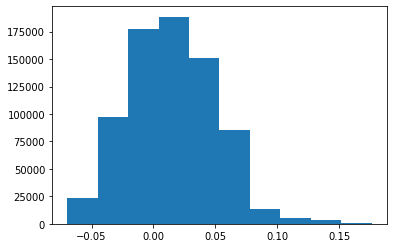

In [6]:
import matplotlib.pyplot as plt
plt.hist(dataset_bitcoinRate['rate'])

In [7]:
# rate > 0.01 -> 1 
# rate < -0.01 -> -1
# others -> 0
def label(x):
    if x >= 0.01:
        return 1
    elif x <= -0.01:
        return -1
    return 0        

In [8]:
dataset_bitcoinRate['affect'] = dataset_bitcoinRate['rate'].apply(lambda x: label(x))

In [10]:
dataset_bitcoinRate.groupby(dataset_bitcoinRate['affect']).count()

,text,rate
affect,,
-1,194020,194020
0,155801,155801
1,395955,395955


In [11]:
dataset_bitcoinRate.to_csv("dataset_bitcoin_final.csv", index = False)